In [157]:
import pandas as pd
import numpy as np
import psycopg2


In [158]:
conn = psycopg2.connect(host='localhost', dbname= 'bama',
                    user='postgres', password='123',
                    port=5432)



cursor = conn.cursor()
conn.autocommit = True



cursor.execute("""SELECT * FROM CarInfo""")


data = cursor.fetchall()

cursor.execute("""
Select * FROM CarInfo LIMIT 0
""")
colnames = [desc[0] for desc in cursor.description]

df = pd.DataFrame(data, columns=colnames)

df.head()

,id,brand,model,submodel,year,location,price,gearbox,operations,body,gas,color,insidecolor
0,1,پژو,207,پانوراما دنده ای,1402,تهران / میدان جمهوری,توافقی,دنده ای,کارکرد صفر,بدون رنگ,بنزینی,مشکی,داخل مشکی
1,2,سمند,سورن,پلاس بنزینی,1401,قم / جمهوری,"538,000,000",دنده ای,"28,000 کیلومتر",بدون رنگ,بنزینی,سفید,داخل مشکی
2,3,پژو,206,تیپ 2,1399,تهران / رسالت,"430,000,000",دنده ای,"30,000 کیلومتر",بدون رنگ,بنزینی,خاکستری,داخل مشکی
3,4,پژو,پارس,XU7P,1401,تهران / شاهین,"488,000,000",دنده ای,"13,000 کیلومتر",بدون رنگ,بنزینی,مشکی,داخل مشکی
4,5,پژو,2008,اتوماتیک,1397,کرمان,توافقی,اتوماتیک,"12,000 کیلومتر",بدون رنگ,بنزینی,سفید,داخل مشکی


In [159]:
'''
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['gas'] = lb.fit_transform(df['gas'])
{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['gas'])))}

lb = LabelEncoder()

df['color'] = lb.fit_transform(df['color'])
{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['color'])))}


lb = LabelEncoder()

df['insidecolor'] = lb.fit_transform(df['insidecolor'])
{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['insidecolor'])))}

lb = LabelEncoder()

df['body'] = lb.fit_transform(df['body'])
{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['body'])))}'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\nlb = LabelEncoder()\n\ndf['gas'] = lb.fit_transform(df['gas'])\n{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['gas'])))}\n\nlb = LabelEncoder()\n\ndf['color'] = lb.fit_transform(df['color'])\n{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['color'])))}\n\n\nlb = LabelEncoder()\n\ndf['insidecolor'] = lb.fit_transform(df['insidecolor'])\n{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['insidecolor'])))}\n\nlb = LabelEncoder()\n\ndf['body'] = lb.fit_transform(df['body'])\n{k:v for k,v in zip(lb.classes_, np.unique(lb.fit_transform(df['body'])))}"

In [160]:
df['operations'] = df.operations.str.replace('کارکرد صفر', '0').str.replace('کیلومتر', '').str.replace(',', '')
df['operations'] = df['operations'].replace('کارکرده', np.nan)
df['operations'] = df['operations'].astype('Int64')

In [161]:
df['gearbox'] = df['gearbox'].apply(lambda x:1 if x=='اتوماتیک' else 0)
df['price'] = df['price'].replace('توافقی', np.nan).str.replace(',', '').astype('Int64') / 1e6
df['year'] =  df['year'].astype('int64')
df['location'] = df.location.str.split('/').str.get(0)

In [162]:
df.head()


,id,brand,model,submodel,year,location,price,gearbox,operations,body,gas,color,insidecolor
0,1,پژو,207,پانوراما دنده ای,1402,تهران,<NA>,0,0,بدون رنگ,بنزینی,مشکی,داخل مشکی
1,2,سمند,سورن,پلاس بنزینی,1401,قم,538.0,0,28000,بدون رنگ,بنزینی,سفید,داخل مشکی
2,3,پژو,206,تیپ 2,1399,تهران,430.0,0,30000,بدون رنگ,بنزینی,خاکستری,داخل مشکی
3,4,پژو,پارس,XU7P,1401,تهران,488.0,0,13000,بدون رنگ,بنزینی,مشکی,داخل مشکی
4,5,پژو,2008,اتوماتیک,1397,کرمان,<NA>,1,12000,بدون رنگ,بنزینی,سفید,داخل مشکی


In [169]:
df.sort_values(by='price')[:20]

,id,brand,model,submodel,year,location,price,gearbox,operations,body,gas,color,insidecolor
1822,2710,پژو,پارس,LX,1388,تهران,15.0,0,200000,بدون رنگ,بنزینی,نقره ای,داخل مشکی
2847,4178,پراید,صندوق دار,دنده ای,1378,تبریز,66.0,0,300000,دور رنگ,بنزینی,سفید,داخل طوسی
2138,3179,پراید,صندوق دار,دنده ای,1378,تهران,67.0,0,350000,دور رنگ,بنزینی,سفید,داخل خاکستری
1027,1643,پراید,صندوق دار,دنده ای,1377,تهران,70.0,0,500000,دور رنگ,بنزینی,سفید,داخل طوسی
908,1521,پراید,هاچ بک,دنده ای,1375,تهران,80.0,0,352000,دور رنگ,بنزینی,سفید,داخل مشکی
2563,3776,پراید,151,SE,1402,تهران,83.0,0,0,بدون رنگ,بنزینی,سفید,داخل مشکی
1496,2174,پراید,صندوق دار,دنده ای,1382,تهران,85.0,0,192000,بدون رنگ,بنزینی,نوک مدادی,داخل خاکستری
1872,2776,پراید,صندوق دار,دنده ای,1384,رباط کریم,98.8,0,250000,چند لکه رنگ,بنزینی,سفید,داخل مشکی
2568,3787,کوییک,دنده ای R,دنده ای,1402,تهران,104.0,0,0,بدون رنگ,بنزینی,سفید,داخل مشکی
2445,3599,پراید,صندوق دار,دنده ای,1383,کرج,105.0,0,300000,دو لکه رنگ,بنزینی,نوک مدادی,داخل مشکی


In [173]:
import seaborn as sns


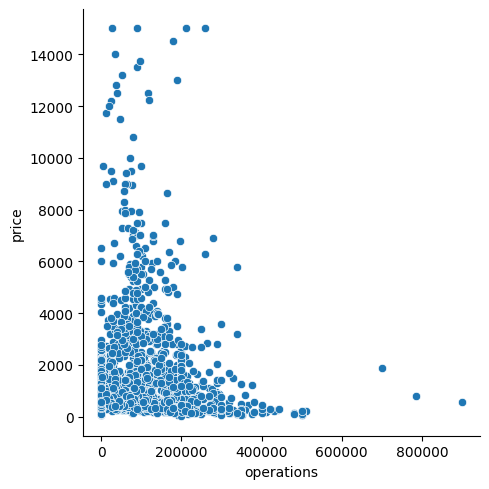

In [165]:
sns.relplot(data=df, x='operations', y='price')

In [170]:
df.drop(columns=['id'], inplace=True)
df.to_csv('Bama.csv')